# Neural Network

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adagrad
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from numpy import asarray
from sklearn.metrics import mean_absolute_error
import numpy as np
np.set_printoptions(precision=3)

### Create Model

In [2]:
"""
Resource 1
"""
def create_model(n, optimizer, dropout_rate):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(n,)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='relu'))
    
    model.compile(loss='mse', optimizer = optimizer, metrics=['mae'])
    
    return model

### Splitting the Data

In [3]:
y = pd.read_csv('y.csv')

In [4]:
# best hyperparameters: feature selection = Mutual Info Regression
x2_mutualinforegression = pd.read_csv('x2_mutualinforegression.csv')
n = len(x2_mutualinforegression.columns)
X_train, X_test, y_train, y_test = train_test_split(x2_mutualinforegression, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, n

((728, 16), (182, 16), 16)

## Training

 best hyperparameters: batch = 1, optimizer=Adagrad, dropout rate=0.2

In [37]:
"""
Resource 2
"""
# best hyperparameters: batch = 1, optimizer=Adagrad, dropout rate=0.2
optimizer = Adagrad(learning_rate = 0.05)
dropout_rate = 0.2
batch_size = 1

model = create_model(n, optimizer, dropout_rate)

history = model.fit(X_train,
                    y_train,
                    validation_split = 0.2,
                    epochs=200,
                    batch_size=batch_size,
                    verbose=1
                   )

Epoch 1/200
582/582 [==============================] - 1s 1ms/step - loss: 505.5097 - mae: 4.6849 - val_loss: 179.5778 - val_mae: 3.3551
Epoch 2/200
582/582 [==============================] - 1s 1ms/step - loss: 267.9629 - mae: 3.3893 - val_loss: 250.7979 - val_mae: 4.5011
Epoch 3/200
582/582 [==============================] - 1s 2ms/step - loss: 133.0178 - mae: 2.9800 - val_loss: 129.6745 - val_mae: 3.1245
Epoch 4/200
582/582 [==============================] - 1s 2ms/step - loss: 254.0707 - mae: 3.3994 - val_loss: 125.1942 - val_mae: 3.1448
Epoch 5/200
582/582 [==============================] - 1s 1ms/step - loss: 138.9173 - mae: 2.8784 - val_loss: 110.4811 - val_mae: 2.8972
Epoch 6/200
582/582 [==============================] - 1s 2ms/step - loss: 169.2962 - mae: 2.9328 - val_loss: 389.6417 - val_mae: 4.5802
Epoch 7/200
582/582 [==============================] - 1s 2ms/step - loss: 174.2552 - mae: 2.8520 - val_loss: 196.6535 - val_mae: 3.4585
Epoch 8/200
582/582 [====================

Epoch 61/200
582/582 [==============================] - 1s 2ms/step - loss: 24.3903 - mae: 1.5092 - val_loss: 119.2371 - val_mae: 2.7968
Epoch 62/200
582/582 [==============================] - 1s 2ms/step - loss: 30.1838 - mae: 1.5535 - val_loss: 193.8420 - val_mae: 3.3363
Epoch 63/200
582/582 [==============================] - 1s 2ms/step - loss: 26.3594 - mae: 1.4414 - val_loss: 183.7724 - val_mae: 3.3035
Epoch 64/200
582/582 [==============================] - 1s 2ms/step - loss: 50.5155 - mae: 1.7764 - val_loss: 125.0659 - val_mae: 2.8656
Epoch 65/200
582/582 [==============================] - 1s 2ms/step - loss: 22.3746 - mae: 1.4449 - val_loss: 157.6395 - val_mae: 3.1511
Epoch 66/200
582/582 [==============================] - 1s 3ms/step - loss: 33.8363 - mae: 1.4822 - val_loss: 188.5824 - val_mae: 3.3483
Epoch 67/200
582/582 [==============================] - 1s 2ms/step - loss: 29.5349 - mae: 1.5694 - val_loss: 257.2067 - val_mae: 3.7520
Epoch 68/200
582/582 [===================

582/582 [==============================] - 1s 2ms/step - loss: 26.8115 - mae: 1.3180 - val_loss: 195.2027 - val_mae: 3.2658
Epoch 180/200
582/582 [==============================] - 1s 1ms/step - loss: 19.6094 - mae: 1.3163 - val_loss: 161.5038 - val_mae: 3.0487
Epoch 181/200
582/582 [==============================] - 1s 1ms/step - loss: 14.0536 - mae: 1.1914 - val_loss: 131.3034 - val_mae: 2.7434
Epoch 182/200
582/582 [==============================] - 1s 1ms/step - loss: 24.3553 - mae: 1.2164 - val_loss: 161.6848 - val_mae: 3.0013
Epoch 183/200
582/582 [==============================] - 1s 2ms/step - loss: 21.4781 - mae: 1.2289 - val_loss: 162.4529 - val_mae: 3.0323
Epoch 184/200
582/582 [==============================] - 1s 1ms/step - loss: 14.2532 - mae: 1.2091 - val_loss: 147.5036 - val_mae: 2.8682
Epoch 185/200
582/582 [==============================] - 1s 1ms/step - loss: 12.0616 - mae: 1.1253 - val_loss: 154.0606 - val_mae: 2.9628
Epoch 186/200
582/582 [=========================

In [6]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

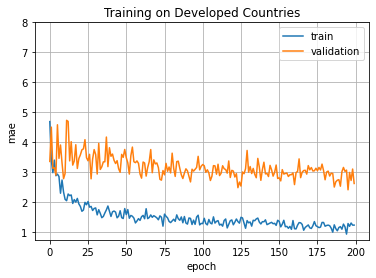

6/6 [==============================] - 0s 2ms/step - loss: 58.3794 - mae: 2.1292


[58.37940979003906, 2.129176378250122]

In [38]:
"""
Resource 3
"""
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Training on Developed Countries')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.ylim(top = 8)
plt.grid()
plt.show()

score1 = model.evaluate(X_test, y_test, verbose=1)
score1

## Predicting

### Prediction scaling
We're scaling prediction data with mean and standard deviation values of trained data, so that prediction values range would match the training

In [25]:
def scale_prediction(n, columns, X):
    X_scaled = X
    counter = -1
    
    for col in range(0, n):
        counter += 1 # for each column
        col_mean = x_original[columns[counter]].mean()
        col_std = x_original[columns[counter]].std()
        for row in range(0, len(X)):
            X_scaled.loc[row][col] = (X.loc[row][col] - col_mean) / col_std
    return X_scaled

In [26]:
x_original = pd.read_csv('x_original.csv')
x_original.shape

(910, 24)

## Predicting on Developing Countries Banks

In [117]:
""" Resource 4
"""
developing = pd.read_csv('developing_banks_dropped.csv')
developing = developing.fillna(developing.median())
developing.shape

(128, 39)

In [118]:
y_developing = developing['marketCap']
best_feature_names = pd.read_csv('best_feature_names2.csv')['0'].to_list()
X_developing = developing[best_feature_names]

columns_developing = list(X_developing.columns)
X_scaled_developing = scale_prediction(n, columns_developing, X_developing)

In [119]:
predict_developing = model.predict(X_scaled_developing)

developing['prediction'] = pd.DataFrame(predict_developing)
developing['marketCap'] = developing['marketCap'] / 10**9

In [120]:
developing[['shortName', 'marketCap', 'prediction']]

,shortName,marketCap,prediction
0,HDFC BANK,119.246483,82.248817
1,ICICI BANK,67.968793,45.202789
2,STATE BK OF INDIA,55.169843,42.277294
3,KOTAK MAHINDRA BAN,54.205208,21.268042
4,AXIS BANK,33.720593,20.644005
...,...,...,...
123,VAKIFLAR BANKASI,1.562017,5.354911
124,T. HALK BANKASI,1.343121,3.268083
125,T.S.K.B.,0.406916,1.682636
126,ALBARAKA TURK,0.238569,0.159744


### MAE on Developing Banking Sector

In [121]:
developing_score = model.evaluate(X_scaled_developing, y_developing, verbose=1)
developing_score

4/4 [==============================] - 0s 4ms/step - loss: 53.5697 - mae: 3.6093


[53.56966781616211, 3.6093146800994873]

### Developing Markets

In [74]:
print('prediction mean:', developing['prediction'].mean(),'\nmarketCap mean:', developing['marketCap'].mean())

prediction mean: 6.865645408630371 
marketCap mean: 8.18444582285047


## Predicting on Turkish Banks

In [76]:
turkey = pd.read_csv('turkey_dropped.csv')
turkey = turkey.fillna(turkey.median())
turkey.shape

(10, 32)

In [77]:
y_tur = turkey['marketCap']
best_feature_names = pd.read_csv('best_feature_names2.csv')['0'].to_list()
X_tur = turkey[best_feature_names]

columns_tur = list(X_tur.columns)
X_scaled_tur = scale_prediction(n, columns_tur, X_tur)

In [78]:
predict_tur = model.predict(X_scaled_tur)

turkey['prediction'] = pd.DataFrame(predict_tur)
turkey['marketCap'] = turkey['marketCap'] / 10**9

In [79]:
turkey[['shortName', 'marketCap', 'prediction']]

,shortName,marketCap,prediction
0,GARANTI BANKASI,4.585135,9.755918
1,AKBANK,3.355317,9.450097
2,IS BANKASI (C),2.761096,7.289739
3,YAPI VE KREDI BANK.,2.406071,8.160076
4,SABANCI HOLDING,2.291788,7.381636
5,VAKIFLAR BANKASI,1.562017,5.354911
6,T. HALK BANKASI,1.343121,3.268083
7,T.S.K.B.,0.406916,1.682636
8,ALBARAKA TURK,0.238569,0.159744
9,SEKERBANK,0.218410,0.000000


### Turkey Markets

In [80]:
print('prediction mean:', turkey['prediction'].mean(),'\nmarketCap mean:', turkey['marketCap'].mean())

prediction mean: 5.250284194946289 
marketCap mean: 1.9168440234551287


## Calculating the Confidence Intervals for Turkey

In [96]:
"""
Resource 2
"""
def fit_model(X_train, y_train, optimizer, dropout_rate, batch_size):
    model = create_model(n, optimizer, dropout_rate)
    # fit the model on the training dataset
    model.fit(X_train, y_train, validation_split = 0.2, 
              epochs=200, batch_size=batch_size, verbose=1)
    return model

In [97]:
"""
Resource 5
"""
def fit_ensemble(n_members, X_train, X_test, y_train, y_test, optimizer, dropout_rate, batch_size):
    ensemble = list()
    for i in range(n_members):
        # define and fit the model on the training set
        model = fit_model(X_train, y_train, optimizer, dropout_rate, batch_size)
        # evaluate model on the test set
        yhat = model.predict(X_test, verbose=0)
        mae = mean_absolute_error(y_test, yhat)
        print('>%d, MAE: %.3f' % (i+1, mae))
        # store the model
        ensemble.append(model)
    return ensemble

In [98]:
"""
Resource 5, this needs to be adapted so I can have multiple inputs
"""
# make predictions with the ensemble and calculate a prediction interval
def predict_with_pi(ensemble, X):
    # make predictions
    yhat = [model.predict(X, verbose=0) for model in ensemble]
    yhat = asarray(yhat)
    # calculate 95% gaussian prediction interval
    interval = 1.96 * yhat.std()
    lower, upper = yhat.mean() - interval, yhat.mean() + interval
    return lower, yhat.mean(), upper

In [99]:
# fit ensemble
n_members = 20
ensemble = fit_ensemble(n_members, X_train, X_test, y_train, y_test, optimizer, dropout_rate, batch_size)

Epoch 1/200
582/582 [==============================] - 2s 3ms/step - loss: 216.8482 - mae: 3.8307 - val_loss: 158.8501 - val_mae: 3.5413
Epoch 2/200
582/582 [==============================] - 1s 2ms/step - loss: 354.0474 - mae: 4.0937 - val_loss: 149.8277 - val_mae: 3.5738
Epoch 3/200
582/582 [==============================] - 1s 2ms/step - loss: 246.4409 - mae: 3.4878 - val_loss: 127.0762 - val_mae: 3.2615
Epoch 4/200
582/582 [==============================] - 1s 2ms/step - loss: 116.6865 - mae: 2.7191 - val_loss: 130.5362 - val_mae: 2.9970
Epoch 5/200
582/582 [==============================] - 1s 2ms/step - loss: 129.3053 - mae: 2.8123 - val_loss: 103.4702 - val_mae: 2.6417
Epoch 6/200
582/582 [==============================] - 2s 3ms/step - loss: 107.8079 - mae: 2.3919 - val_loss: 406.4452 - val_mae: 4.5871
Epoch 7/200
582/582 [==============================] - 1s 2ms/step - loss: 167.4833 - mae: 2.7532 - val_loss: 388.8951 - val_mae: 4.3629
Epoch 8/200
582/582 [====================

Epoch 61/200
582/582 [==============================] - 2s 3ms/step - loss: 17.8430 - mae: 1.2745 - val_loss: 219.6886 - val_mae: 3.3071
Epoch 62/200
582/582 [==============================] - 2s 3ms/step - loss: 21.6938 - mae: 1.4694 - val_loss: 238.6792 - val_mae: 3.4892
Epoch 63/200
582/582 [==============================] - 2s 3ms/step - loss: 32.1218 - mae: 1.5328 - val_loss: 266.2675 - val_mae: 3.6473
Epoch 64/200
582/582 [==============================] - 1s 2ms/step - loss: 20.0202 - mae: 1.4716 - val_loss: 230.4177 - val_mae: 3.3783
Epoch 65/200
582/582 [==============================] - 1s 2ms/step - loss: 20.5738 - mae: 1.3946 - val_loss: 217.1052 - val_mae: 3.2860
Epoch 66/200
582/582 [==============================] - 1s 2ms/step - loss: 32.3986 - mae: 1.4786 - val_loss: 291.8027 - val_mae: 3.7048
Epoch 67/200
582/582 [==============================] - 1s 2ms/step - loss: 20.3777 - mae: 1.3711 - val_loss: 256.1138 - val_mae: 3.5028
Epoch 68/200
582/582 [===================

582/582 [==============================] - 1s 2ms/step - loss: 18.1363 - mae: 1.2620 - val_loss: 199.8501 - val_mae: 3.1531
Epoch 180/200
582/582 [==============================] - 1s 2ms/step - loss: 13.0385 - mae: 1.1565 - val_loss: 142.9221 - val_mae: 2.7548
Epoch 181/200
582/582 [==============================] - 1s 2ms/step - loss: 7.8400 - mae: 0.9867 - val_loss: 171.1649 - val_mae: 2.9829
Epoch 182/200
582/582 [==============================] - 1s 2ms/step - loss: 15.0156 - mae: 1.2183 - val_loss: 138.6127 - val_mae: 2.7146
Epoch 183/200
582/582 [==============================] - 1s 2ms/step - loss: 32.4735 - mae: 1.3024 - val_loss: 186.5263 - val_mae: 3.0477
Epoch 184/200
582/582 [==============================] - 1s 2ms/step - loss: 12.5002 - mae: 1.0770 - val_loss: 151.7021 - val_mae: 2.8075
Epoch 185/200
582/582 [==============================] - 1s 2ms/step - loss: 23.6044 - mae: 1.3097 - val_loss: 144.9751 - val_mae: 2.7985
Epoch 186/200
582/582 [==========================

Epoch 98/200
582/582 [==============================] - 1s 2ms/step - loss: 25.4129 - mae: 1.6114 - val_loss: 233.4901 - val_mae: 3.5333
Epoch 99/200
582/582 [==============================] - 1s 2ms/step - loss: 19.1601 - mae: 1.4011 - val_loss: 233.5538 - val_mae: 3.5388
Epoch 100/200
582/582 [==============================] - 1s 2ms/step - loss: 21.6088 - mae: 1.5359 - val_loss: 305.7068 - val_mae: 3.8328
Epoch 101/200
582/582 [==============================] - 1s 2ms/step - loss: 22.6683 - mae: 1.5515 - val_loss: 338.8785 - val_mae: 4.0604
Epoch 102/200
582/582 [==============================] - 1s 2ms/step - loss: 26.2667 - mae: 1.5771 - val_loss: 127.1020 - val_mae: 2.9504
Epoch 103/200
582/582 [==============================] - 1s 2ms/step - loss: 35.4995 - mae: 1.6426 - val_loss: 187.0009 - val_mae: 3.2910
Epoch 104/200
582/582 [==============================] - 1s 2ms/step - loss: 27.3685 - mae: 1.6176 - val_loss: 311.5139 - val_mae: 3.8212
Epoch 105/200
582/582 [=============

582/582 [==============================] - 1s 2ms/step - loss: 58.4832 - mae: 1.8195 - val_loss: 659.8591 - val_mae: 5.0415
Epoch 17/200
582/582 [==============================] - 1s 2ms/step - loss: 32.3118 - mae: 1.6873 - val_loss: 229.4118 - val_mae: 3.2878
Epoch 18/200
582/582 [==============================] - 1s 2ms/step - loss: 43.7319 - mae: 1.8055 - val_loss: 420.1666 - val_mae: 4.0679
Epoch 19/200
582/582 [==============================] - 1s 2ms/step - loss: 42.8268 - mae: 1.8333 - val_loss: 149.9453 - val_mae: 2.9839
Epoch 20/200
582/582 [==============================] - 1s 2ms/step - loss: 66.1787 - mae: 1.9760 - val_loss: 266.8097 - val_mae: 3.4534
Epoch 21/200
582/582 [==============================] - 1s 2ms/step - loss: 52.1873 - mae: 1.8889 - val_loss: 347.2187 - val_mae: 3.8577
Epoch 22/200
582/582 [==============================] - 1s 2ms/step - loss: 49.8391 - mae: 1.8035 - val_loss: 358.7379 - val_mae: 3.9696
Epoch 23/200
582/582 [==============================] 

Epoch 76/200
582/582 [==============================] - 1s 2ms/step - loss: 27.5978 - mae: 1.4915 - val_loss: 159.5056 - val_mae: 3.0585
Epoch 77/200
582/582 [==============================] - 1s 2ms/step - loss: 18.6054 - mae: 1.4015 - val_loss: 171.4864 - val_mae: 3.1551
Epoch 78/200
582/582 [==============================] - 1s 2ms/step - loss: 28.9204 - mae: 1.4873 - val_loss: 209.3922 - val_mae: 3.3837
Epoch 79/200
582/582 [==============================] - 1s 2ms/step - loss: 22.0721 - mae: 1.4236 - val_loss: 196.7557 - val_mae: 3.2784
Epoch 80/200
582/582 [==============================] - 1s 2ms/step - loss: 22.4258 - mae: 1.3943 - val_loss: 202.0560 - val_mae: 3.3477
Epoch 81/200
582/582 [==============================] - 2s 3ms/step - loss: 30.9336 - mae: 1.5121 - val_loss: 188.0111 - val_mae: 3.2191
Epoch 82/200
582/582 [==============================] - 2s 3ms/step - loss: 17.9357 - mae: 1.3627 - val_loss: 228.1704 - val_mae: 3.5399
Epoch 83/200
582/582 [===================

582/582 [==============================] - 1s 2ms/step - loss: 10.3057 - mae: 1.0068 - val_loss: 174.6617 - val_mae: 3.0136
Epoch 195/200
582/582 [==============================] - 1s 2ms/step - loss: 12.4296 - mae: 1.0189 - val_loss: 149.9446 - val_mae: 2.5796
Epoch 196/200
582/582 [==============================] - 1s 2ms/step - loss: 11.8852 - mae: 1.0655 - val_loss: 150.1581 - val_mae: 2.6249
Epoch 197/200
582/582 [==============================] - 1s 2ms/step - loss: 10.7292 - mae: 1.0478 - val_loss: 149.7529 - val_mae: 2.5514
Epoch 198/200
582/582 [==============================] - 1s 2ms/step - loss: 11.7015 - mae: 1.0859 - val_loss: 147.9910 - val_mae: 2.5989
Epoch 199/200
582/582 [==============================] - 1s 2ms/step - loss: 11.2032 - mae: 1.0731 - val_loss: 152.4289 - val_mae: 2.6014
Epoch 200/200
582/582 [==============================] - 1s 2ms/step - loss: 15.8362 - mae: 1.0228 - val_loss: 177.2165 - val_mae: 3.1099
>3, MAE: 2.126
Epoch 1/200
582/582 [============

Epoch 54/200
582/582 [==============================] - 1s 2ms/step - loss: 29.2992 - mae: 1.7055 - val_loss: 235.6807 - val_mae: 3.6620
Epoch 55/200
582/582 [==============================] - 2s 3ms/step - loss: 31.2949 - mae: 1.6913 - val_loss: 360.9947 - val_mae: 4.3464
Epoch 56/200
582/582 [==============================] - 1s 2ms/step - loss: 29.4077 - mae: 1.6984 - val_loss: 407.3047 - val_mae: 4.4774
Epoch 57/200
582/582 [==============================] - 1s 2ms/step - loss: 23.9438 - mae: 1.6174 - val_loss: 307.2726 - val_mae: 4.0096
Epoch 58/200
582/582 [==============================] - 1s 2ms/step - loss: 29.5373 - mae: 1.6188 - val_loss: 224.9470 - val_mae: 3.5158
Epoch 59/200
582/582 [==============================] - 1s 2ms/step - loss: 32.8136 - mae: 1.6536 - val_loss: 255.3037 - val_mae: 3.7110
Epoch 60/200
582/582 [==============================] - 1s 2ms/step - loss: 40.8543 - mae: 1.7079 - val_loss: 268.3788 - val_mae: 3.7718
Epoch 61/200
582/582 [===================

Epoch 114/200
582/582 [==============================] - 2s 3ms/step - loss: 37.7598 - mae: 1.6124 - val_loss: 257.4448 - val_mae: 3.6607
Epoch 115/200
582/582 [==============================] - 1s 2ms/step - loss: 23.7198 - mae: 1.4617 - val_loss: 253.3282 - val_mae: 3.6513
Epoch 116/200
582/582 [==============================] - 2s 3ms/step - loss: 19.4106 - mae: 1.3856 - val_loss: 225.6421 - val_mae: 3.4598
Epoch 117/200
582/582 [==============================] - 2s 3ms/step - loss: 21.7677 - mae: 1.4227 - val_loss: 246.5674 - val_mae: 3.6061
Epoch 118/200
582/582 [==============================] - 2s 3ms/step - loss: 29.7978 - mae: 1.4187 - val_loss: 274.6278 - val_mae: 3.7059
Epoch 119/200
582/582 [==============================] - 1s 2ms/step - loss: 24.2693 - mae: 1.3375 - val_loss: 226.7720 - val_mae: 3.4634
Epoch 120/200
582/582 [==============================] - 2s 3ms/step - loss: 25.5523 - mae: 1.4517 - val_loss: 351.5822 - val_mae: 4.1339
Epoch 121/200
582/582 [===========

582/582 [==============================] - 1s 2ms/step - loss: 51.9088 - mae: 1.8709 - val_loss: 474.5031 - val_mae: 4.2588
Epoch 33/200
582/582 [==============================] - 1s 2ms/step - loss: 31.3203 - mae: 1.5208 - val_loss: 316.4279 - val_mae: 3.6323
Epoch 34/200
582/582 [==============================] - 1s 2ms/step - loss: 26.4446 - mae: 1.5560 - val_loss: 372.4552 - val_mae: 3.9116
Epoch 35/200
582/582 [==============================] - 1s 2ms/step - loss: 32.4702 - mae: 1.6261 - val_loss: 193.7813 - val_mae: 3.1486
Epoch 36/200
582/582 [==============================] - 1s 2ms/step - loss: 44.6471 - mae: 1.7518 - val_loss: 310.6302 - val_mae: 3.6700
Epoch 37/200
582/582 [==============================] - 1s 2ms/step - loss: 33.9323 - mae: 1.6589 - val_loss: 508.5302 - val_mae: 4.4998
Epoch 38/200
582/582 [==============================] - 1s 2ms/step - loss: 47.2908 - mae: 1.7798 - val_loss: 270.0318 - val_mae: 3.5482
Epoch 39/200
582/582 [==============================] 

Epoch 92/200
582/582 [==============================] - 1s 2ms/step - loss: 23.5289 - mae: 1.4809 - val_loss: 196.7187 - val_mae: 3.2402
Epoch 93/200
582/582 [==============================] - 1s 2ms/step - loss: 38.8766 - mae: 1.6026 - val_loss: 259.9516 - val_mae: 3.4739
Epoch 94/200
582/582 [==============================] - 1s 2ms/step - loss: 45.9127 - mae: 1.5648 - val_loss: 111.7968 - val_mae: 2.6891
Epoch 95/200
582/582 [==============================] - 1s 2ms/step - loss: 42.2175 - mae: 1.6224 - val_loss: 248.4921 - val_mae: 3.4797
Epoch 96/200
582/582 [==============================] - 1s 2ms/step - loss: 21.5080 - mae: 1.4183 - val_loss: 276.7568 - val_mae: 3.5021
Epoch 97/200
582/582 [==============================] - 1s 2ms/step - loss: 27.8271 - mae: 1.4656 - val_loss: 187.4908 - val_mae: 3.1891
Epoch 98/200
582/582 [==============================] - 1s 2ms/step - loss: 20.2040 - mae: 1.3594 - val_loss: 189.8846 - val_mae: 3.2351
Epoch 99/200
582/582 [===================

Epoch 151/200
582/582 [==============================] - 1s 911us/step - loss: 19.0404 - mae: 1.2960 - val_loss: 182.6471 - val_mae: 3.1892
Epoch 152/200
582/582 [==============================] - 1s 910us/step - loss: 14.4452 - mae: 1.1703 - val_loss: 174.4027 - val_mae: 3.1008
Epoch 153/200
582/582 [==============================] - 1s 912us/step - loss: 13.8564 - mae: 1.2067 - val_loss: 237.0160 - val_mae: 3.4344
Epoch 154/200
582/582 [==============================] - 1s 925us/step - loss: 14.5484 - mae: 1.2597 - val_loss: 190.6979 - val_mae: 3.2150
Epoch 155/200
582/582 [==============================] - 1s 920us/step - loss: 15.1781 - mae: 1.2082 - val_loss: 222.7197 - val_mae: 3.4238
Epoch 156/200
582/582 [==============================] - 1s 903us/step - loss: 12.2049 - mae: 1.1239 - val_loss: 189.3143 - val_mae: 3.2457
Epoch 157/200
582/582 [==============================] - ETA: 0s - loss: 15.8361 - mae: 1.24 - 1s 905us/step - loss: 16.4662 - mae: 1.2576 - val_loss: 199.4301 

Epoch 69/200
582/582 [==============================] - 1s 1ms/step - loss: 34.2969 - mae: 1.6398 - val_loss: 376.8699 - val_mae: 3.9665
Epoch 70/200
582/582 [==============================] - 1s 1ms/step - loss: 43.8841 - mae: 1.6941 - val_loss: 249.9905 - val_mae: 3.3577
Epoch 71/200
582/582 [==============================] - 1s 994us/step - loss: 41.3248 - mae: 1.7426 - val_loss: 260.0918 - val_mae: 3.3888
Epoch 72/200
582/582 [==============================] - 1s 1ms/step - loss: 26.8743 - mae: 1.4899 - val_loss: 287.6089 - val_mae: 3.4741
Epoch 73/200
582/582 [==============================] - 1s 1ms/step - loss: 34.5859 - mae: 1.5917 - val_loss: 290.4994 - val_mae: 3.5472
Epoch 74/200
582/582 [==============================] - 1s 1ms/step - loss: 19.5356 - mae: 1.3983 - val_loss: 385.2123 - val_mae: 4.0085
Epoch 75/200
582/582 [==============================] - 1s 1ms/step - loss: 27.1003 - mae: 1.4444 - val_loss: 347.7810 - val_mae: 3.8059
Epoch 76/200
582/582 [=================

582/582 [==============================] - 1s 1ms/step - loss: 13.3887 - mae: 1.1502 - val_loss: 166.0807 - val_mae: 3.0401
Epoch 188/200
582/582 [==============================] - 1s 1ms/step - loss: 9.0604 - mae: 1.0685 - val_loss: 181.9057 - val_mae: 3.1584
Epoch 189/200
582/582 [==============================] - 1s 1ms/step - loss: 13.0755 - mae: 1.1635 - val_loss: 188.8047 - val_mae: 3.1838
Epoch 190/200
582/582 [==============================] - 1s 1ms/step - loss: 13.0948 - mae: 1.1886 - val_loss: 155.9208 - val_mae: 2.9044
Epoch 191/200
582/582 [==============================] - 1s 1ms/step - loss: 8.3002 - mae: 0.9886 - val_loss: 171.9291 - val_mae: 3.0368
Epoch 192/200
582/582 [==============================] - 1s 1ms/step - loss: 23.3243 - mae: 1.2994 - val_loss: 171.7284 - val_mae: 3.0982
Epoch 193/200
582/582 [==============================] - 1s 1ms/step - loss: 11.3044 - mae: 1.0557 - val_loss: 162.3332 - val_mae: 3.0169
Epoch 194/200
582/582 [===========================

Epoch 47/200
582/582 [==============================] - 1s 1ms/step - loss: 25.2575 - mae: 1.4769 - val_loss: 304.1003 - val_mae: 3.6652
Epoch 48/200
582/582 [==============================] - 1s 1ms/step - loss: 24.2341 - mae: 1.4825 - val_loss: 236.0386 - val_mae: 3.2834
Epoch 49/200
582/582 [==============================] - 1s 2ms/step - loss: 24.6521 - mae: 1.4374 - val_loss: 221.3602 - val_mae: 3.1496
Epoch 50/200
582/582 [==============================] - 1s 1ms/step - loss: 26.2381 - mae: 1.5126 - val_loss: 193.6468 - val_mae: 2.9983
Epoch 51/200
582/582 [==============================] - 1s 1ms/step - loss: 20.5864 - mae: 1.4009 - val_loss: 231.8184 - val_mae: 3.2392
Epoch 52/200
582/582 [==============================] - 1s 1ms/step - loss: 46.7951 - mae: 1.6161 - val_loss: 158.1998 - val_mae: 2.8171
Epoch 53/200
582/582 [==============================] - 1s 1ms/step - loss: 39.7365 - mae: 1.5944 - val_loss: 295.4533 - val_mae: 3.5857
Epoch 54/200
582/582 [===================

582/582 [==============================] - 1s 1ms/step - loss: 10.3448 - mae: 1.0670 - val_loss: 164.2794 - val_mae: 2.9665
Epoch 166/200
582/582 [==============================] - 1s 2ms/step - loss: 8.5986 - mae: 1.0193 - val_loss: 158.4677 - val_mae: 2.9278
Epoch 167/200
582/582 [==============================] - 1s 1ms/step - loss: 12.9763 - mae: 1.1593 - val_loss: 183.6889 - val_mae: 3.1238
Epoch 168/200
582/582 [==============================] - 1s 1ms/step - loss: 10.6941 - mae: 1.1144 - val_loss: 177.3918 - val_mae: 3.0615
Epoch 169/200
582/582 [==============================] - 1s 2ms/step - loss: 8.8225 - mae: 0.9603 - val_loss: 147.3288 - val_mae: 2.8329
Epoch 170/200
582/582 [==============================] - 1s 2ms/step - loss: 17.5320 - mae: 1.2386 - val_loss: 142.6153 - val_mae: 2.7349
Epoch 171/200
582/582 [==============================] - 1s 1ms/step - loss: 17.0775 - mae: 1.1331 - val_loss: 153.1357 - val_mae: 2.7989
Epoch 172/200
582/582 [===========================

Epoch 84/200
582/582 [==============================] - 1s 2ms/step - loss: 31.4756 - mae: 1.4583 - val_loss: 180.7449 - val_mae: 3.3147
Epoch 85/200
582/582 [==============================] - 1s 2ms/step - loss: 16.6453 - mae: 1.2817 - val_loss: 223.9598 - val_mae: 3.5940
Epoch 86/200
582/582 [==============================] - 1s 2ms/step - loss: 21.2047 - mae: 1.3720 - val_loss: 215.7390 - val_mae: 3.5213
Epoch 87/200
582/582 [==============================] - 1s 1ms/step - loss: 12.1640 - mae: 1.1927 - val_loss: 221.5811 - val_mae: 3.5349
Epoch 88/200
582/582 [==============================] - 1s 1ms/step - loss: 17.9598 - mae: 1.2310 - val_loss: 226.3771 - val_mae: 3.5254
Epoch 89/200
582/582 [==============================] - 1s 2ms/step - loss: 23.3891 - mae: 1.3701 - val_loss: 185.7033 - val_mae: 3.3831
Epoch 90/200
582/582 [==============================] - 1s 1ms/step - loss: 17.7027 - mae: 1.2817 - val_loss: 176.3360 - val_mae: 3.2696
Epoch 91/200
582/582 [===================

582/582 [==============================] - 1s 1ms/step - loss: 290.8068 - mae: 3.4540 - val_loss: 190.3707 - val_mae: 3.8612
Epoch 3/200
582/582 [==============================] - 1s 2ms/step - loss: 167.2760 - mae: 3.0894 - val_loss: 113.9832 - val_mae: 2.8826
Epoch 4/200
582/582 [==============================] - 1s 2ms/step - loss: 111.0254 - mae: 2.7735 - val_loss: 144.3652 - val_mae: 3.1420
Epoch 5/200
582/582 [==============================] - 1s 1ms/step - loss: 99.8200 - mae: 2.4783 - val_loss: 380.0018 - val_mae: 4.4959
Epoch 6/200
582/582 [==============================] - 1s 1ms/step - loss: 128.2688 - mae: 2.9422 - val_loss: 245.1435 - val_mae: 3.5659
Epoch 7/200
582/582 [==============================] - 1s 1ms/step - loss: 84.5652 - mae: 2.4170 - val_loss: 270.3829 - val_mae: 3.5722
Epoch 8/200
582/582 [==============================] - 1s 1ms/step - loss: 58.9575 - mae: 2.0865 - val_loss: 204.7810 - val_mae: 3.0492
Epoch 9/200
582/582 [==============================] - 1

Epoch 62/200
582/582 [==============================] - 1s 1ms/step - loss: 31.9072 - mae: 1.4882 - val_loss: 316.8587 - val_mae: 3.7159
Epoch 63/200
582/582 [==============================] - 1s 1ms/step - loss: 30.2273 - mae: 1.4625 - val_loss: 249.7702 - val_mae: 3.4967
Epoch 64/200
582/582 [==============================] - 1s 1ms/step - loss: 22.5848 - mae: 1.2992 - val_loss: 249.2170 - val_mae: 3.5405
Epoch 65/200
582/582 [==============================] - 1s 1ms/step - loss: 22.4663 - mae: 1.4032 - val_loss: 282.0145 - val_mae: 3.6667
Epoch 66/200
582/582 [==============================] - 1s 1ms/step - loss: 24.2848 - mae: 1.3553 - val_loss: 305.2540 - val_mae: 3.7623
Epoch 67/200
582/582 [==============================] - 1s 1ms/step - loss: 31.4153 - mae: 1.4290 - val_loss: 357.4026 - val_mae: 3.9109
Epoch 68/200
582/582 [==============================] - 1s 1ms/step - loss: 20.0188 - mae: 1.3697 - val_loss: 293.5797 - val_mae: 3.7639
Epoch 69/200
582/582 [===================

582/582 [==============================] - 2s 3ms/step - loss: 12.6096 - mae: 1.1068 - val_loss: 195.3351 - val_mae: 3.3250
Epoch 181/200
582/582 [==============================] - 1s 2ms/step - loss: 17.4473 - mae: 1.1128 - val_loss: 244.0967 - val_mae: 3.5870
Epoch 182/200
582/582 [==============================] - 1s 2ms/step - loss: 11.9504 - mae: 1.0607 - val_loss: 255.8426 - val_mae: 3.6875
Epoch 183/200
582/582 [==============================] - 1s 2ms/step - loss: 11.7746 - mae: 1.1099 - val_loss: 254.6064 - val_mae: 3.6594
Epoch 184/200
582/582 [==============================] - 1s 2ms/step - loss: 20.1332 - mae: 1.2370 - val_loss: 189.5295 - val_mae: 3.3115
Epoch 185/200
582/582 [==============================] - 2s 3ms/step - loss: 10.0757 - mae: 1.0261 - val_loss: 236.2063 - val_mae: 3.6008
Epoch 186/200
582/582 [==============================] - 1s 2ms/step - loss: 10.3833 - mae: 0.9851 - val_loss: 197.7276 - val_mae: 3.3434
Epoch 187/200
582/582 [=========================

Epoch 99/200
582/582 [==============================] - 1s 1ms/step - loss: 24.0644 - mae: 1.4453 - val_loss: 209.1321 - val_mae: 3.1459
Epoch 100/200
582/582 [==============================] - 1s 1ms/step - loss: 24.0411 - mae: 1.4250 - val_loss: 184.5187 - val_mae: 2.9906
Epoch 101/200
582/582 [==============================] - 1s 1ms/step - loss: 30.7940 - mae: 1.4021 - val_loss: 176.3168 - val_mae: 2.9450
Epoch 102/200
582/582 [==============================] - 1s 1ms/step - loss: 40.6788 - mae: 1.5168 - val_loss: 293.9474 - val_mae: 3.5849
Epoch 103/200
582/582 [==============================] - 1s 1ms/step - loss: 16.9529 - mae: 1.1593 - val_loss: 195.7032 - val_mae: 3.0392
Epoch 104/200
582/582 [==============================] - 1s 1ms/step - loss: 31.6305 - mae: 1.4641 - val_loss: 225.2014 - val_mae: 3.2693
Epoch 105/200
582/582 [==============================] - 1s 1ms/step - loss: 24.0529 - mae: 1.3622 - val_loss: 144.3547 - val_mae: 2.7627
Epoch 106/200
582/582 [============

582/582 [==============================] - 1s 1ms/step - loss: 15.6135 - mae: 1.1659 - val_loss: 188.0005 - val_mae: 2.9891
Epoch 159/200
582/582 [==============================] - 1s 1ms/step - loss: 10.4635 - mae: 1.0787 - val_loss: 181.8964 - val_mae: 2.9715
Epoch 160/200
582/582 [==============================] - 1s 1ms/step - loss: 11.0918 - mae: 1.0825 - val_loss: 166.8507 - val_mae: 2.8635
Epoch 161/200
582/582 [==============================] - 1s 1ms/step - loss: 17.1627 - mae: 1.1881 - val_loss: 149.8620 - val_mae: 2.7290
Epoch 162/200
582/582 [==============================] - 1s 1ms/step - loss: 15.1301 - mae: 1.1864 - val_loss: 189.4033 - val_mae: 3.0422
Epoch 163/200
582/582 [==============================] - 1s 1ms/step - loss: 18.2962 - mae: 1.2510 - val_loss: 183.1612 - val_mae: 2.9703
Epoch 164/200
582/582 [==============================] - 1s 1ms/step - loss: 12.9834 - mae: 1.1063 - val_loss: 144.1126 - val_mae: 2.6797
Epoch 165/200
582/582 [=========================

Epoch 77/200
582/582 [==============================] - 1s 1ms/step - loss: 21.6199 - mae: 1.4490 - val_loss: 199.8064 - val_mae: 3.4250
Epoch 78/200
582/582 [==============================] - 1s 1ms/step - loss: 23.9268 - mae: 1.4109 - val_loss: 199.0881 - val_mae: 3.3981
Epoch 79/200
582/582 [==============================] - 1s 1ms/step - loss: 23.8279 - mae: 1.3754 - val_loss: 157.6020 - val_mae: 3.1543
Epoch 80/200
582/582 [==============================] - 1s 2ms/step - loss: 23.4826 - mae: 1.3760 - val_loss: 258.7426 - val_mae: 3.7226
Epoch 81/200
582/582 [==============================] - 1s 1ms/step - loss: 19.5423 - mae: 1.3291 - val_loss: 183.4734 - val_mae: 3.2924
Epoch 82/200
582/582 [==============================] - 1s 1ms/step - loss: 18.4555 - mae: 1.3182 - val_loss: 143.2671 - val_mae: 3.0206
Epoch 83/200
582/582 [==============================] - 1s 1ms/step - loss: 39.0524 - mae: 1.5438 - val_loss: 203.5893 - val_mae: 3.4428
Epoch 84/200
582/582 [===================

582/582 [==============================] - 2s 4ms/step - loss: 17.9368 - mae: 1.1678 - val_loss: 126.6976 - val_mae: 2.7273
Epoch 196/200
582/582 [==============================] - 2s 4ms/step - loss: 15.5590 - mae: 1.1861 - val_loss: 150.6912 - val_mae: 2.9859
Epoch 197/200
582/582 [==============================] - 2s 3ms/step - loss: 18.8053 - mae: 1.2399 - val_loss: 271.0685 - val_mae: 3.8508
Epoch 198/200
582/582 [==============================] - 2s 3ms/step - loss: 16.3247 - mae: 1.1918 - val_loss: 133.4830 - val_mae: 2.7746
Epoch 199/200
582/582 [==============================] - 1s 2ms/step - loss: 17.7060 - mae: 1.2315 - val_loss: 233.4308 - val_mae: 3.5888
Epoch 200/200
582/582 [==============================] - 2s 3ms/step - loss: 16.1236 - mae: 1.1596 - val_loss: 187.3588 - val_mae: 3.2546
>11, MAE: 1.892
Epoch 1/200
582/582 [==============================] - 2s 2ms/step - loss: 412.1910 - mae: 4.8509 - val_loss: 399.2941 - val_mae: 5.1652
Epoch 2/200
582/582 [============

Epoch 55/200
582/582 [==============================] - 1s 2ms/step - loss: 25.6951 - mae: 1.5554 - val_loss: 426.0817 - val_mae: 3.9574
Epoch 56/200
582/582 [==============================] - 1s 2ms/step - loss: 35.6071 - mae: 1.7125 - val_loss: 623.4033 - val_mae: 4.6998
Epoch 57/200
582/582 [==============================] - 1s 2ms/step - loss: 27.9906 - mae: 1.5842 - val_loss: 346.5558 - val_mae: 3.7417
Epoch 58/200
582/582 [==============================] - 1s 2ms/step - loss: 47.2908 - mae: 1.7706 - val_loss: 579.2429 - val_mae: 4.5934
Epoch 59/200
582/582 [==============================] - 1s 2ms/step - loss: 25.5371 - mae: 1.5327 - val_loss: 530.7516 - val_mae: 4.3858
Epoch 60/200
582/582 [==============================] - 1s 1ms/step - loss: 23.8954 - mae: 1.4161 - val_loss: 458.0918 - val_mae: 4.1144
Epoch 61/200
582/582 [==============================] - 1s 2ms/step - loss: 47.7322 - mae: 1.8644 - val_loss: 431.8614 - val_mae: 3.9610
Epoch 62/200
582/582 [===================

Epoch 115/200
582/582 [==============================] - 1s 2ms/step - loss: 29.9178 - mae: 1.4777 - val_loss: 371.6209 - val_mae: 3.8696
Epoch 116/200
582/582 [==============================] - 1s 2ms/step - loss: 21.4211 - mae: 1.3605 - val_loss: 363.2378 - val_mae: 3.8079
Epoch 117/200
582/582 [==============================] - 1s 2ms/step - loss: 12.9397 - mae: 1.1671 - val_loss: 416.6339 - val_mae: 4.0128
Epoch 118/200
582/582 [==============================] - 1s 1ms/step - loss: 34.3401 - mae: 1.5180 - val_loss: 397.3322 - val_mae: 3.9374
Epoch 119/200
582/582 [==============================] - 1s 1ms/step - loss: 15.0902 - mae: 1.2184 - val_loss: 360.8618 - val_mae: 3.8515
Epoch 120/200
582/582 [==============================] - 1s 1ms/step - loss: 19.2326 - mae: 1.2810 - val_loss: 294.9598 - val_mae: 3.6282
Epoch 121/200
582/582 [==============================] - 1s 1ms/step - loss: 21.3508 - mae: 1.3387 - val_loss: 393.8119 - val_mae: 3.9373
Epoch 122/200
582/582 [===========

582/582 [==============================] - 1s 1ms/step - loss: 28.4114 - mae: 1.5517 - val_loss: 412.8621 - val_mae: 3.9595
Epoch 34/200
582/582 [==============================] - 1s 1ms/step - loss: 30.3849 - mae: 1.5914 - val_loss: 409.5249 - val_mae: 4.0298
Epoch 35/200
582/582 [==============================] - 1s 2ms/step - loss: 30.5721 - mae: 1.6268 - val_loss: 540.5836 - val_mae: 4.4609
Epoch 36/200
582/582 [==============================] - 1s 1ms/step - loss: 46.4728 - mae: 1.7613 - val_loss: 282.4720 - val_mae: 3.5459
Epoch 37/200
582/582 [==============================] - 1s 1ms/step - loss: 46.9218 - mae: 1.6827 - val_loss: 254.3326 - val_mae: 3.4056
Epoch 38/200
582/582 [==============================] - 1s 1ms/step - loss: 25.9788 - mae: 1.4683 - val_loss: 278.4375 - val_mae: 3.4457
Epoch 39/200
582/582 [==============================] - 1s 1ms/step - loss: 31.6538 - mae: 1.5290 - val_loss: 602.5364 - val_mae: 4.6745
Epoch 40/200
582/582 [==============================] 

Epoch 93/200
582/582 [==============================] - 1s 2ms/step - loss: 22.6239 - mae: 1.3102 - val_loss: 294.3600 - val_mae: 3.8403
Epoch 94/200
582/582 [==============================] - 1s 2ms/step - loss: 21.6754 - mae: 1.3243 - val_loss: 215.8668 - val_mae: 3.4713
Epoch 95/200
582/582 [==============================] - 1s 2ms/step - loss: 18.6660 - mae: 1.3368 - val_loss: 252.8796 - val_mae: 3.6489
Epoch 96/200
582/582 [==============================] - 1s 2ms/step - loss: 21.5427 - mae: 1.3756 - val_loss: 267.0794 - val_mae: 3.7012
Epoch 97/200
582/582 [==============================] - 1s 2ms/step - loss: 18.9496 - mae: 1.3198 - val_loss: 175.3501 - val_mae: 3.1894
Epoch 98/200
582/582 [==============================] - 1s 2ms/step - loss: 14.2605 - mae: 1.2106 - val_loss: 221.9568 - val_mae: 3.5031
Epoch 99/200
582/582 [==============================] - 1s 2ms/step - loss: 13.8968 - mae: 1.1452 - val_loss: 222.3040 - val_mae: 3.4861
Epoch 100/200
582/582 [==================

Epoch 11/200
582/582 [==============================] - 1s 1ms/step - loss: 921.3689 - mae: 6.2722 - val_loss: 846.3331 - val_mae: 7.8029
Epoch 12/200
582/582 [==============================] - 1s 1ms/step - loss: 921.3698 - mae: 6.2722 - val_loss: 846.3331 - val_mae: 7.8029
Epoch 13/200
582/582 [==============================] - 1s 1ms/step - loss: 921.3698 - mae: 6.2722 - val_loss: 846.3331 - val_mae: 7.8029
Epoch 14/200
582/582 [==============================] - 1s 1ms/step - loss: 921.3693 - mae: 6.2722 - val_loss: 846.3331 - val_mae: 7.8029
Epoch 15/200
582/582 [==============================] - 1s 1ms/step - loss: 921.3698 - mae: 6.2722 - val_loss: 846.3331 - val_mae: 7.8029
Epoch 16/200
582/582 [==============================] - 1s 1ms/step - loss: 921.3692 - mae: 6.2722 - val_loss: 846.3331 - val_mae: 7.8029
Epoch 17/200
582/582 [==============================] - 1s 1ms/step - loss: 921.3690 - mae: 6.2722 - val_loss: 846.3331 - val_mae: 7.8029
Epoch 18/200
582/582 [============

582/582 [==============================] - 1s 1ms/step - loss: 27.9443 - mae: 1.6315 - val_loss: 417.2740 - val_mae: 4.2487
Epoch 130/200
582/582 [==============================] - 1s 1ms/step - loss: 28.9631 - mae: 1.6442 - val_loss: 353.5144 - val_mae: 3.9608
Epoch 131/200
582/582 [==============================] - 1s 1ms/step - loss: 31.7419 - mae: 1.6313 - val_loss: 253.3849 - val_mae: 3.4747
Epoch 132/200
582/582 [==============================] - 1s 1ms/step - loss: 39.9921 - mae: 1.7239 - val_loss: 367.5706 - val_mae: 4.0032
Epoch 133/200
582/582 [==============================] - 1s 1ms/step - loss: 42.8395 - mae: 1.7467 - val_loss: 284.8198 - val_mae: 3.5762
Epoch 134/200
582/582 [==============================] - 1s 1ms/step - loss: 40.5459 - mae: 1.7251 - val_loss: 321.9534 - val_mae: 3.7832
Epoch 135/200
582/582 [==============================] - 1s 1ms/step - loss: 17.6897 - mae: 1.3598 - val_loss: 354.4115 - val_mae: 3.8982
Epoch 136/200
582/582 [=========================

Epoch 48/200
582/582 [==============================] - 1s 1ms/step - loss: 34.7465 - mae: 1.6436 - val_loss: 149.2758 - val_mae: 3.0317
Epoch 49/200
582/582 [==============================] - 1s 1ms/step - loss: 35.2938 - mae: 1.5883 - val_loss: 153.1609 - val_mae: 3.0482
Epoch 50/200
582/582 [==============================] - 1s 1ms/step - loss: 28.8294 - mae: 1.5140 - val_loss: 231.7943 - val_mae: 3.4393
Epoch 51/200
582/582 [==============================] - 1s 1ms/step - loss: 32.5738 - mae: 1.5839 - val_loss: 266.0752 - val_mae: 3.5867
Epoch 52/200
582/582 [==============================] - 1s 1ms/step - loss: 31.1835 - mae: 1.5453 - val_loss: 255.3469 - val_mae: 3.6178
Epoch 53/200
582/582 [==============================] - 1s 1ms/step - loss: 24.1583 - mae: 1.4779 - val_loss: 224.9412 - val_mae: 3.5179
Epoch 54/200
582/582 [==============================] - 1s 1ms/step - loss: 21.1818 - mae: 1.3436 - val_loss: 220.9866 - val_mae: 3.4241
Epoch 55/200
582/582 [===================

Epoch 108/200
582/582 [==============================] - 1s 1ms/step - loss: 25.4146 - mae: 1.3606 - val_loss: 316.9838 - val_mae: 3.7733
Epoch 109/200
582/582 [==============================] - 1s 1ms/step - loss: 25.2932 - mae: 1.3670 - val_loss: 124.5610 - val_mae: 2.8214
Epoch 110/200
582/582 [==============================] - 1s 1ms/step - loss: 27.9267 - mae: 1.3502 - val_loss: 170.8874 - val_mae: 3.1257
Epoch 111/200
582/582 [==============================] - 1s 1ms/step - loss: 15.0550 - mae: 1.0944 - val_loss: 106.3171 - val_mae: 2.5989
Epoch 112/200
582/582 [==============================] - 1s 1ms/step - loss: 20.2851 - mae: 1.2924 - val_loss: 193.2520 - val_mae: 3.2612
Epoch 113/200
582/582 [==============================] - 1s 1ms/step - loss: 14.1606 - mae: 1.2354 - val_loss: 160.6306 - val_mae: 3.0311
Epoch 114/200
582/582 [==============================] - 1s 1ms/step - loss: 10.8841 - mae: 1.1306 - val_loss: 195.2977 - val_mae: 3.2677
Epoch 115/200
582/582 [===========

582/582 [==============================] - 1s 1ms/step - loss: 45.7414 - mae: 1.7814 - val_loss: 374.4445 - val_mae: 3.8567
Epoch 27/200
582/582 [==============================] - 1s 1ms/step - loss: 57.1506 - mae: 1.9993 - val_loss: 592.6014 - val_mae: 4.5721
Epoch 28/200
582/582 [==============================] - 1s 1ms/step - loss: 53.7869 - mae: 1.7699 - val_loss: 183.4785 - val_mae: 3.1196
Epoch 29/200
582/582 [==============================] - 1s 1ms/step - loss: 75.3861 - mae: 2.0992 - val_loss: 493.5066 - val_mae: 4.3185
Epoch 30/200
582/582 [==============================] - 1s 1ms/step - loss: 41.7174 - mae: 1.7625 - val_loss: 233.2383 - val_mae: 3.3546
Epoch 31/200
582/582 [==============================] - 1s 1ms/step - loss: 46.6589 - mae: 1.7982 - val_loss: 499.5869 - val_mae: 4.4577
Epoch 32/200
582/582 [==============================] - 1s 1ms/step - loss: 55.1934 - mae: 1.8223 - val_loss: 244.8500 - val_mae: 3.4505
Epoch 33/200
582/582 [==============================] 

Epoch 86/200
582/582 [==============================] - 1s 1ms/step - loss: 15.8549 - mae: 1.2527 - val_loss: 246.0689 - val_mae: 3.4654
Epoch 87/200
582/582 [==============================] - 1s 1ms/step - loss: 20.0529 - mae: 1.3307 - val_loss: 260.4084 - val_mae: 3.4844
Epoch 88/200
582/582 [==============================] - 1s 1ms/step - loss: 58.2095 - mae: 1.7035 - val_loss: 113.4493 - val_mae: 2.4722
Epoch 89/200
582/582 [==============================] - 1s 1ms/step - loss: 42.8414 - mae: 1.4906 - val_loss: 252.7666 - val_mae: 3.5019
Epoch 90/200
582/582 [==============================] - 1s 1ms/step - loss: 29.5136 - mae: 1.4283 - val_loss: 236.6755 - val_mae: 3.4168
Epoch 91/200
582/582 [==============================] - 1s 1ms/step - loss: 21.5805 - mae: 1.3929 - val_loss: 209.8310 - val_mae: 3.2931
Epoch 92/200
582/582 [==============================] - 1s 1ms/step - loss: 19.7994 - mae: 1.3074 - val_loss: 255.3836 - val_mae: 3.4601
Epoch 93/200
582/582 [===================

582/582 [==============================] - 1s 1ms/step - loss: 220.6059 - mae: 3.2173 - val_loss: 119.3687 - val_mae: 3.0159
Epoch 5/200
582/582 [==============================] - 1s 1ms/step - loss: 190.1735 - mae: 2.8967 - val_loss: 131.7954 - val_mae: 3.0457
Epoch 6/200
582/582 [==============================] - 1s 1ms/step - loss: 101.1825 - mae: 2.5641 - val_loss: 421.9403 - val_mae: 4.6170
Epoch 7/200
582/582 [==============================] - 1s 1ms/step - loss: 86.3821 - mae: 2.5484 - val_loss: 114.3436 - val_mae: 2.6937
Epoch 8/200
582/582 [==============================] - 1s 1ms/step - loss: 94.7592 - mae: 2.4038 - val_loss: 234.9963 - val_mae: 3.3032
Epoch 9/200
582/582 [==============================] - 1s 1ms/step - loss: 121.0133 - mae: 2.5561 - val_loss: 121.2263 - val_mae: 2.8054
Epoch 10/200
582/582 [==============================] - 1s 1ms/step - loss: 121.6082 - mae: 2.3817 - val_loss: 468.6781 - val_mae: 4.2443
Epoch 11/200
582/582 [==============================] 

Epoch 64/200
582/582 [==============================] - 1s 1ms/step - loss: 19.6981 - mae: 1.4430 - val_loss: 383.6242 - val_mae: 4.0447
Epoch 65/200
582/582 [==============================] - 1s 1ms/step - loss: 24.0169 - mae: 1.3575 - val_loss: 270.4918 - val_mae: 3.4927
Epoch 66/200
582/582 [==============================] - 1s 1ms/step - loss: 29.3065 - mae: 1.5682 - val_loss: 218.6914 - val_mae: 3.2235
Epoch 67/200
582/582 [==============================] - 1s 1ms/step - loss: 32.8245 - mae: 1.5838 - val_loss: 266.5456 - val_mae: 3.4352
Epoch 68/200
582/582 [==============================] - 1s 1ms/step - loss: 25.2164 - mae: 1.4220 - val_loss: 348.4542 - val_mae: 3.7616
Epoch 69/200
582/582 [==============================] - 1s 1ms/step - loss: 24.5963 - mae: 1.4209 - val_loss: 257.9115 - val_mae: 3.4031
Epoch 70/200
582/582 [==============================] - 1s 1ms/step - loss: 23.7729 - mae: 1.3065 - val_loss: 362.9000 - val_mae: 3.8934
Epoch 71/200
582/582 [===================

582/582 [==============================] - 1s 1ms/step - loss: 12.3747 - mae: 1.1046 - val_loss: 203.8312 - val_mae: 3.2775
Epoch 183/200
582/582 [==============================] - 1s 1ms/step - loss: 13.7922 - mae: 1.0994 - val_loss: 120.4217 - val_mae: 2.5624
Epoch 184/200
582/582 [==============================] - 1s 1ms/step - loss: 27.9928 - mae: 1.1924 - val_loss: 179.3336 - val_mae: 3.1291
Epoch 185/200
582/582 [==============================] - 1s 1ms/step - loss: 9.9090 - mae: 0.9520 - val_loss: 199.1624 - val_mae: 3.2727
Epoch 186/200
582/582 [==============================] - 1s 1ms/step - loss: 19.8853 - mae: 1.2491 - val_loss: 170.2105 - val_mae: 3.0574
Epoch 187/200
582/582 [==============================] - 1s 1ms/step - loss: 9.4899 - mae: 1.0179 - val_loss: 151.2969 - val_mae: 2.9358
Epoch 188/200
582/582 [==============================] - 1s 1ms/step - loss: 11.0252 - mae: 1.0810 - val_loss: 125.5636 - val_mae: 2.6683
Epoch 189/200
582/582 [===========================

Epoch 42/200
582/582 [==============================] - 1s 2ms/step - loss: 33.1489 - mae: 1.7202 - val_loss: 344.1644 - val_mae: 3.7515
Epoch 43/200
582/582 [==============================] - 2s 3ms/step - loss: 24.7054 - mae: 1.4953 - val_loss: 253.7766 - val_mae: 3.3193
Epoch 44/200
582/582 [==============================] - 1s 2ms/step - loss: 55.3384 - mae: 1.5814 - val_loss: 348.2086 - val_mae: 3.7457
Epoch 45/200
582/582 [==============================] - 1s 2ms/step - loss: 21.5161 - mae: 1.5267 - val_loss: 306.0938 - val_mae: 3.6097
Epoch 46/200
582/582 [==============================] - 1s 2ms/step - loss: 23.3540 - mae: 1.4508 - val_loss: 331.6117 - val_mae: 3.6946
Epoch 47/200
582/582 [==============================] - 1s 2ms/step - loss: 30.8255 - mae: 1.6686 - val_loss: 273.7722 - val_mae: 3.3818
Epoch 48/200
582/582 [==============================] - 1s 2ms/step - loss: 24.6676 - mae: 1.4632 - val_loss: 221.1721 - val_mae: 3.1651
Epoch 49/200
582/582 [===================

Epoch 102/200
582/582 [==============================] - 1s 1ms/step - loss: 14.0285 - mae: 1.1866 - val_loss: 198.6012 - val_mae: 3.0618
Epoch 103/200
582/582 [==============================] - 1s 1ms/step - loss: 11.4925 - mae: 1.1989 - val_loss: 271.0188 - val_mae: 3.6285
Epoch 104/200
582/582 [==============================] - 1s 2ms/step - loss: 23.3882 - mae: 1.4553 - val_loss: 226.9912 - val_mae: 3.2486
Epoch 105/200
582/582 [==============================] - 1s 2ms/step - loss: 26.5457 - mae: 1.4366 - val_loss: 164.3017 - val_mae: 2.9354
Epoch 106/200
582/582 [==============================] - 1s 1ms/step - loss: 36.1834 - mae: 1.5242 - val_loss: 240.9854 - val_mae: 3.3229
Epoch 107/200
582/582 [==============================] - 1s 1ms/step - loss: 13.6927 - mae: 1.1693 - val_loss: 152.5806 - val_mae: 2.8000
Epoch 108/200
582/582 [==============================] - 1s 2ms/step - loss: 19.4642 - mae: 1.3137 - val_loss: 190.9286 - val_mae: 3.0169
Epoch 109/200
582/582 [===========

582/582 [==============================] - 1s 1ms/step - loss: 73.1138 - mae: 2.0108 - val_loss: 228.4799 - val_mae: 3.3817
Epoch 21/200
582/582 [==============================] - 1s 1ms/step - loss: 51.9650 - mae: 1.8771 - val_loss: 227.8514 - val_mae: 3.4501
Epoch 22/200
582/582 [==============================] - 1s 1ms/step - loss: 45.3488 - mae: 1.7350 - val_loss: 361.7791 - val_mae: 4.0015
Epoch 23/200
582/582 [==============================] - 1s 1ms/step - loss: 33.6117 - mae: 1.6791 - val_loss: 372.8164 - val_mae: 4.0023
Epoch 24/200
582/582 [==============================] - 1s 1ms/step - loss: 32.6221 - mae: 1.6856 - val_loss: 315.6783 - val_mae: 3.7190
Epoch 25/200
582/582 [==============================] - 1s 1ms/step - loss: 36.7856 - mae: 1.6768 - val_loss: 326.6390 - val_mae: 3.8662
Epoch 26/200
582/582 [==============================] - 1s 1ms/step - loss: 43.1258 - mae: 1.7518 - val_loss: 386.9377 - val_mae: 4.1610
Epoch 27/200
582/582 [==============================] 

Epoch 80/200
582/582 [==============================] - 1s 1ms/step - loss: 37.4096 - mae: 1.7807 - val_loss: 132.8593 - val_mae: 2.9967
Epoch 81/200
582/582 [==============================] - 1s 1ms/step - loss: 23.2000 - mae: 1.3574 - val_loss: 206.2092 - val_mae: 3.4732
Epoch 82/200
582/582 [==============================] - 1s 1ms/step - loss: 32.0091 - mae: 1.6728 - val_loss: 196.4430 - val_mae: 3.3881
Epoch 83/200
582/582 [==============================] - 1s 1ms/step - loss: 16.5539 - mae: 1.2531 - val_loss: 187.4744 - val_mae: 3.3417
Epoch 84/200
582/582 [==============================] - 1s 1ms/step - loss: 20.4196 - mae: 1.3635 - val_loss: 189.8052 - val_mae: 3.3595
Epoch 85/200
582/582 [==============================] - 1s 1ms/step - loss: 24.1663 - mae: 1.3203 - val_loss: 138.8454 - val_mae: 3.0141
Epoch 86/200
582/582 [==============================] - 1s 1ms/step - loss: 17.8362 - mae: 1.3758 - val_loss: 200.2014 - val_mae: 3.4644
Epoch 87/200
582/582 [===================

582/582 [==============================] - 1s 1ms/step - loss: 11.6999 - mae: 1.0739 - val_loss: 138.0784 - val_mae: 2.7118
Epoch 199/200
582/582 [==============================] - 1s 1ms/step - loss: 7.2434 - mae: 0.9475 - val_loss: 139.4235 - val_mae: 2.7249
Epoch 200/200
582/582 [==============================] - 1s 1ms/step - loss: 10.7862 - mae: 1.0619 - val_loss: 136.6662 - val_mae: 2.7146
>19, MAE: 1.907
Epoch 1/200
582/582 [==============================] - 1s 2ms/step - loss: 278.2858 - mae: 3.9388 - val_loss: 640.4919 - val_mae: 6.8543
Epoch 2/200
582/582 [==============================] - 1s 1ms/step - loss: 159.4335 - mae: 3.3935 - val_loss: 142.0896 - val_mae: 3.0245
Epoch 3/200
582/582 [==============================] - 1s 1ms/step - loss: 222.4271 - mae: 3.6823 - val_loss: 163.3802 - val_mae: 3.6605
Epoch 4/200
582/582 [==============================] - 1s 1ms/step - loss: 180.6829 - mae: 3.2252 - val_loss: 519.7883 - val_mae: 6.1475
Epoch 5/200
582/582 [================

Epoch 58/200
582/582 [==============================] - 1s 1ms/step - loss: 27.6689 - mae: 1.4618 - val_loss: 247.4480 - val_mae: 3.5135
Epoch 59/200
582/582 [==============================] - 1s 1ms/step - loss: 24.2274 - mae: 1.5760 - val_loss: 253.9524 - val_mae: 3.5553
Epoch 60/200
582/582 [==============================] - 1s 1ms/step - loss: 23.3526 - mae: 1.4652 - val_loss: 256.3398 - val_mae: 3.5249
Epoch 61/200
582/582 [==============================] - 1s 1ms/step - loss: 14.1347 - mae: 1.2147 - val_loss: 198.8274 - val_mae: 3.2190
Epoch 62/200
582/582 [==============================] - 1s 1ms/step - loss: 47.0273 - mae: 1.6203 - val_loss: 386.3175 - val_mae: 4.0794
Epoch 63/200
582/582 [==============================] - 1s 1ms/step - loss: 49.2419 - mae: 1.8298 - val_loss: 135.6368 - val_mae: 2.8011
Epoch 64/200
582/582 [==============================] - 1s 1ms/step - loss: 30.1416 - mae: 1.5709 - val_loss: 292.6475 - val_mae: 3.7516
Epoch 65/200
582/582 [===================

582/582 [==============================] - 1s 1ms/step - loss: 29.6592 - mae: 1.2581 - val_loss: 166.1000 - val_mae: 3.2166
Epoch 177/200
582/582 [==============================] - 1s 1ms/step - loss: 12.7758 - mae: 1.0878 - val_loss: 249.3099 - val_mae: 3.7378
Epoch 178/200
582/582 [==============================] - 1s 1ms/step - loss: 21.8190 - mae: 1.3389 - val_loss: 264.9035 - val_mae: 3.7874
Epoch 179/200
582/582 [==============================] - 1s 1ms/step - loss: 27.8473 - mae: 1.3455 - val_loss: 165.7808 - val_mae: 3.1705
Epoch 180/200
582/582 [==============================] - 1s 1ms/step - loss: 9.4118 - mae: 0.9934 - val_loss: 245.9569 - val_mae: 3.6852
Epoch 181/200
582/582 [==============================] - 1s 1ms/step - loss: 10.4210 - mae: 1.0807 - val_loss: 219.4748 - val_mae: 3.5670
Epoch 182/200
582/582 [==============================] - 1s 1ms/step - loss: 11.4461 - mae: 1.0762 - val_loss: 215.8933 - val_mae: 3.5314
Epoch 183/200
582/582 [==========================

### Predict Turkey

In [105]:
"""
Resource 5
make predictions with prediction interval
"""

p_turkey = turkey[['symbol', 'shortName', 'marketCap']]
point_prediction = []
lower_bound = []
upper_bound = []

for i in range(0, len(X_scaled_tur)):
    newX = asarray([X_scaled_tur.loc[i, :]])
    lower, mean, upper = predict_with_pi(ensemble, newX)
    point_prediction.append(mean)
    lower_bound.append(lower)
    upper_bound.append(upper)

In [106]:
p_turkey['point_prediction'] = point_prediction
p_turkey['lower_bound'] = lower_bound
p_turkey['upper_bound'] = upper_bound
p_turkey

<ipython-input-106-3e02045ebf1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_turkey['point_prediction'] = point_prediction
<ipython-input-106-3e02045ebf1c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_turkey['lower_bound'] = lower_bound
<ipython-input-106-3e02045ebf1c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

,symbol,shortName,marketCap,point_prediction,lower_bound,upper_bound
0,GARAN.IS,GARANTI BANKASI,4.585135,9.839768,7.636162,12.043374
1,AKBNK.IS,AKBANK,3.355317,8.856296,7.538009,10.174582
2,ISCTR.IS,IS BANKASI (C),2.761096,8.548029,5.645167,11.450891
3,YKBNK.IS,YAPI VE KREDI BANK.,2.406071,7.097673,5.773831,8.421515
4,SAHOL.IS,SABANCI HOLDING,2.291788,7.013840,4.849965,9.177715
5,VAKBN.IS,VAKIFLAR BANKASI,1.562017,5.386577,4.030570,6.742583
6,HALKB.IS,T. HALK BANKASI,1.343121,4.381282,2.309190,6.453375
7,TSKB.IS,T.S.K.B.,0.406916,1.100016,0.537522,1.662511
8,ALBRK.IS,ALBARAKA TURK,0.238569,0.118892,-0.082575,0.320360
9,SKBNK.IS,SEKERBANK,0.218410,0.024867,-0.142633,0.192368


In [107]:
p_turkey.to_csv('turkey_predictions.csv', index = False)

### Predict Developing

In [122]:
"""
Resource 5
make predictions with prediction interval
"""
p_developing = developing[['symbol', 'shortName', 'marketCap']]
point_prediction_developing = []
lower_bound_developing = []
upper_bound_developing = []

for i in range(0, len(X_scaled_developing)):
    newX_developing = asarray([X_scaled_developing.loc[i, :]])
    lower_developing, mean_developing, upper_developing = predict_with_pi(ensemble, newX_developing)
    point_prediction_developing.append(mean_developing)
    lower_bound_developing.append(lower_developing)
    upper_bound_developing.append(upper_developing)

In [123]:
p_developing['point_prediction_developing'] = point_prediction_developing
p_developing['lower_bound_developing'] = lower_bound_developing
p_developing['upper_bound_developing'] = upper_bound_developing
p_developing['country'] = developing['country']
p_developing

<ipython-input-123-1e01f149b8c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_developing['point_prediction_developing'] = point_prediction_developing
<ipython-input-123-1e01f149b8c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_developing['lower_bound_developing'] = lower_bound_developing
<ipython-input-123-1e01f149b8c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,symbol,shortName,marketCap,point_prediction_developing,lower_bound_developing,upper_bound_developing,country
0,HDFCBANK.NS,HDFC BANK,119.246483,82.549179,74.300049,90.798309,India
1,ICICIBANK.NS,ICICI BANK,67.968793,48.909954,40.255404,57.564504,India
2,SBIN.NS,STATE BK OF INDIA,55.169843,58.287987,45.688508,70.887466,India
3,KOTAKBANK.NS,KOTAK MAHINDRA BAN,54.205208,22.408054,14.680852,30.135257,India
4,AXISBANK.NS,AXIS BANK,33.720593,20.288666,15.627705,24.949627,India
...,...,...,...,...,...,...,...
123,VAKBN.IS,VAKIFLAR BANKASI,1.562017,5.386577,4.030570,6.742583,Turkey
124,HALKB.IS,T. HALK BANKASI,1.343121,4.381282,2.309190,6.453375,Turkey
125,TSKB.IS,T.S.K.B.,0.406916,1.100016,0.537522,1.662511,Turkey
126,ALBRK.IS,ALBARAKA TURK,0.238569,0.118892,-0.082575,0.320360,Turkey


In [124]:
p_developing.to_csv('developing_predictions.csv', index = False)

Resources:

1. Keras Sequential model: https://keras.io/guides/sequential_model/
2. Train model: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
3. Display model training history: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
4. Pandas Fillna: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
5. Confidence interval: https://machinelearningmastery.com/prediction-intervals-for-deep-learning-neural-networks/